In [2]:
from ISLP import load_data
Boston = load_data('Boston')

In [17]:
import pandas as pd

df = pd.DataFrame(Boston)
rows, columns = df.shape
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [14]:
print(f"number of rows are {rows}")
print(f"Number of columns are {columns}")

number of rows are 506
Number of columns are 13


<Axes: xlabel='rm', ylabel='crim'>

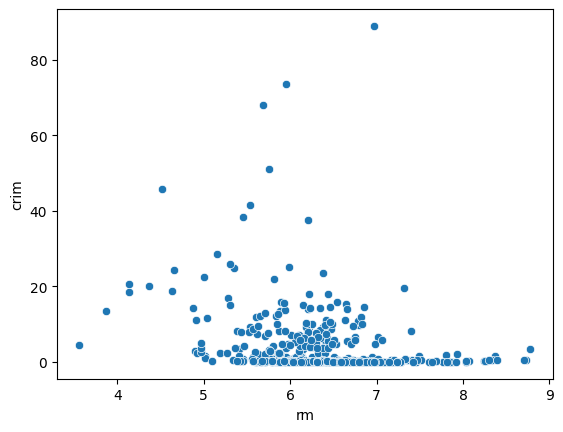

In [22]:
import seaborn as sns

sns.scatterplot(data=df, x="rm", y="crim")

<Axes: xlabel='age', ylabel='medv'>

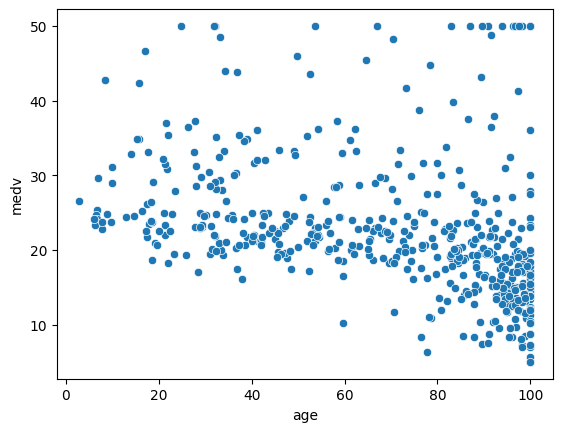

In [24]:
sns.scatterplot(data=df, x="age", y="medv")

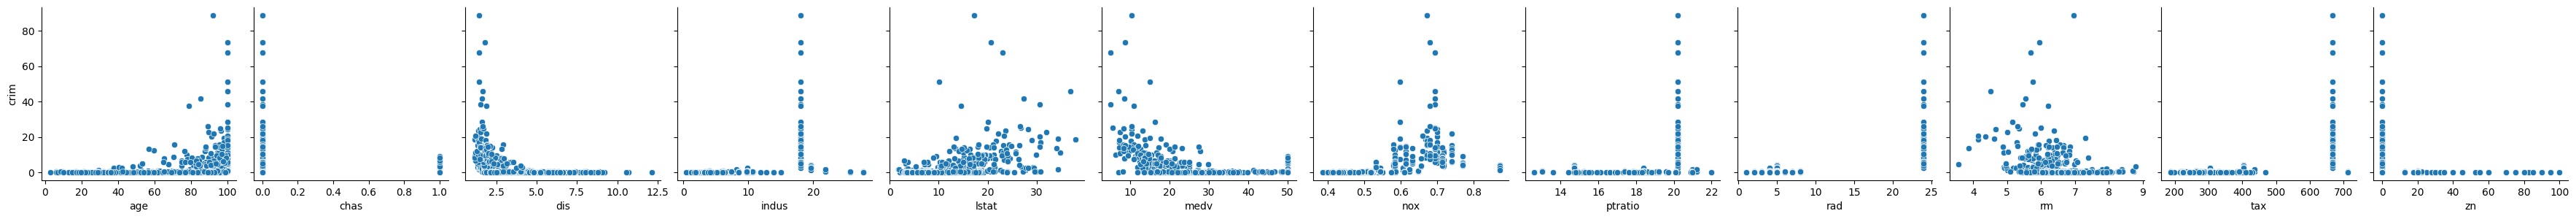

Correlation with crim:
 crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
age        0.352734
ptratio    0.289946
chas      -0.055892
zn        -0.200469
rm        -0.219247
dis       -0.379670
medv      -0.388305
Name: crim, dtype: float64


In [25]:
sns.pairplot(df, x_vars=df.columns.difference(['crim']), y_vars='crim', height=3, aspect=1)
plt.show()

# Calculate correlations
correlations = df.corr()['crim'].sort_values(ascending=False)
print("Correlation with crim:\n", correlations)

In [26]:

# Calculate ranges for each predictor
stats = df.agg(['min', 'max', 'mean', 'median'])
print("Statistics for predictors:\n", stats)

# Identify suburbs with particularly high values
high_crim = df[df['crim'] > df['crim'].quantile(0.95)]  # Top 5% crime rates
high_tax = df[df['tax'] > df['tax'].quantile(0.95)]     # Top 5% tax rates
high_ptratio = df[df['ptratio'] > df['ptratio'].quantile(0.95)]  # Top 5% pupil-teacher ratios

print("\nSuburbs with high crime rates:\n", high_crim)
print("\nSuburbs with high tax rates:\n", high_tax)
print("\nSuburbs with high pupil-teacher ratios:\n", high_ptratio)


Statistics for predictors:
              crim          zn      indus     chas       nox        rm  \
min      0.006320    0.000000   0.460000  0.00000  0.385000  3.561000   
max     88.976200  100.000000  27.740000  1.00000  0.871000  8.780000   
mean     3.613524   11.363636  11.136779  0.06917  0.554695  6.284634   
median   0.256510    0.000000   9.690000  0.00000  0.538000  6.208500   

               age        dis        rad         tax    ptratio      lstat  \
min       2.900000   1.129600   1.000000  187.000000  12.600000   1.730000   
max     100.000000  12.126500  24.000000  711.000000  22.000000  37.970000   
mean     68.574901   3.795043   9.549407  408.237154  18.455534  12.653063   
median   77.500000   3.207450   5.000000  330.000000  19.050000  11.360000   

             medv  
min      5.000000  
max     50.000000  
mean    22.532806  
median  21.200000  

Suburbs with high crime rates:
         crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
374  18.4